In [1]:
import cv2
from ar_markers import detect_markers
import matplotlib.pyplot as plt
import os
import numpy as np
from imutils import perspective
import imutils

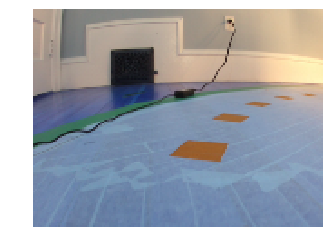

In [2]:
images = []
for path in sorted(os.listdir('data/centraldetection/images/')):
    im = cv2.imread('data/centraldetection/images/'+ path)
    images.append(im)
    
plt.imshow(images[10], cmap='gray')
plt.axis('off')
plt.show()

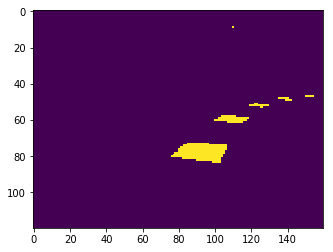

In [4]:
img = images[10].copy()

lower_blue = np.array([100,100,100])
upper_blue = np.array([110,255,255])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.imshow(mask)
plt.show()

In [89]:
 def steering_v2(img):
    # takes image and returns a steering "angle" where stearing angle is between [-1,1]
    # negative numbers means go right
    # positive numbers
    lower_blue = np.array([100,100,100])
    upper_blue = np.array([110,255,255])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    plt.imshow(mask)

    half_x = 80
    full_y = 120

    h, w = np.shape(mask)

    major = cv2.__version__.split('.')[0] 
    if major == '3':
        _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    else:
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 1:
        c = contours[1]
    else:
        self.throttle = 0
        return 0

    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)

    # calculate moments for each contour

    M = cv2.moments(c)

    # calculate x,y coordinate of center
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX = (box[1][0] + box[0][0])//2
        cY = (box[1][1] + box[0][1])//2

    y_new_coord = full_y - cY
    x_new_coord = cX - half_x

    angle = np.arctan(x_new_coord/y_new_coord) / np.pi

    return angle


he
8 43


10.539183728628229

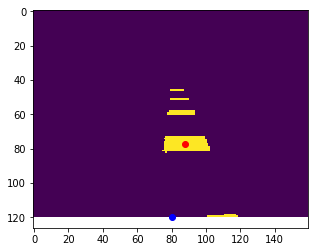

In [94]:
img = images[-30].copy()
angle = steering_v2(img) * 180 / np.pi
angle

(120, 160)


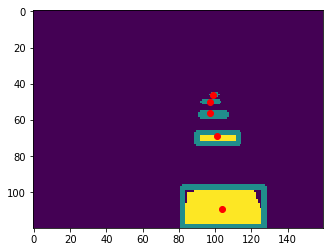

In [5]:
img = images[160].copy()

lower_blue = np.array([100,100,100])
upper_blue = np.array([110,255,255])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# find contours in the binary image
print(np.shape(mask))
contours, hierachy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

X = []
Y = []
width = []

for c in contours:
    
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
 
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(mask, [box.astype("int")], -1, (125), 2)
    
    width.append(box[1][0] - box[0][0])
    
    # calculate moments for each contour

    M = cv2.moments(c)
        
    # calculate x,y coordinate of center
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX = (box[1][0] + box[0][0])//2
        cY = (box[1][1] + box[0][1])//2
    
    X.append(cX)
    Y.append(cY)
        
plt.imshow(mask)

plt.plot(X,Y,'ro')
plt.show()

In [73]:
def estimate_position(width, centroid):
    
    distances = []
    angles = []
    positions = []
    
    f = 127.50 # PIXELS
    W = 7 # CM
    half_x = 80
    full_y = 120

    for w, (x,y) in zip(width, centroid):

        d = f* W / w # PIXELS

        if d > 130:
            d = 130
        distances.append(d)
                    
        y_new_coord = full_y - y
        x_new_coord = x - half_x

        angle = np.arctan(x_new_coord/y_new_coord) 
        angles.append(angle* 180/np.pi)
        
        position = np.sin(angle) * d, np.cos(angle) * d
        positions.append(position)
        
    return positions, angles, distances
    

In [74]:
estimate_position(width,zip(X,Y))

([(18.029785654069968, 8.2636517581154063),
  (14.774747877802525, 35.881530560377563),
  (16.366066504790471, 61.613426841564127),
  (23.403068369989981, 96.365575641135223),
  (32.329732156201963, 125.91579892415503)],
 [65.376435213836373,
  22.380135051959574,
  14.875682001638797,
  13.650419134756991,
  14.400021306791052],
 [19.833333333333332, 38.804347826086953, 63.75, 99.166666666666671, 130])

In [68]:
half_x = 80
full_y = 120

for x,y in zip(X,Y):
    
    y_new_coord = full_y - y
    x_new_coord = x - half_x
    
    print("x", x_new_coord, "y", y_new_coord)
    print("angle", np.arctan(x_new_coord/y_new_coord) * 180/np.pi)


x 24 y 11
angle 65.3764352138
x 21 y 51
angle 22.380135052
x 17 y 64
angle 14.8756820016
x 17.0 y 70.0
angle 13.6504191348
x 19.0 y 74.0
angle 14.4000213068
